<a href="https://colab.research.google.com/github/sudhakarmlal/EVA4/blob/master/Session15/MaskModel_Second.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import cv2
import numpy as np
import os
from glob import glob
%matplotlib inline
#!pip install git+https://github.com/arraiyopensource/kornia

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import io
from itertools import groupby
import cv2
from tqdm.auto import tqdm
from pathlib import Path
from time import time
from torchvision import datasets
from torch.utils.data import DataLoader, Dataset , random_split
from PIL import Image
from torchvision.transforms import transforms
import os
from glob import glob
import torch
import torchvision
from torch import nn
#from kornia.losses import SSIM

In [0]:
#BG_DIR = "./gdrive/My Drive/S15/JPG/BG_BG_COLOR/BG_BG"
#FG_DIR = "./gdrive/My Drive/S15/JPG/FG_BG/FG_BG"
#MASK_DIR = "./gdrive/My Drive/S15/JPG/MS_BG/MS_BG"

BG_DIR = "/content/gdrive/My Drive/MASK1/batch_images1/bg_jpg"
FG_DIR = "/content/gdrive/My Drive/MASK1/batch_images1/fg_jpg"
MASK_DIR = "/content/gdrive/My Drive/MASK1/batch_images1/mask_black_jpg"
DP_DIR = "/content/gdrive/My Drive/MASK1/batch_images1/depth_fg_bg_jpg"
FG_BG_DIR = "/content/gdrive/My Drive/MASK1/batch_images1/fg_bg_jpg"

In [0]:
!ls /content/gdrive/'My Drive'/MASK1/batch_images1/depth_fg_bg_jpg

depth_fg_bg_10_100_0_10.jpg  depth_fg_bg_5_100_0_10.jpg
depth_fg_bg_10_100_0_11.jpg  depth_fg_bg_5_100_0_11.jpg
depth_fg_bg_10_100_0_12.jpg  depth_fg_bg_5_100_0_12.jpg
depth_fg_bg_10_100_0_13.jpg  depth_fg_bg_5_100_0_13.jpg
depth_fg_bg_10_100_0_14.jpg  depth_fg_bg_5_100_0_14.jpg
depth_fg_bg_10_100_0_15.jpg  depth_fg_bg_5_100_0_15.jpg
depth_fg_bg_10_100_0_16.jpg  depth_fg_bg_5_100_0_16.jpg
depth_fg_bg_10_100_0_17.jpg  depth_fg_bg_5_100_0_17.jpg
depth_fg_bg_10_100_0_18.jpg  depth_fg_bg_5_100_0_18.jpg
depth_fg_bg_10_100_0_19.jpg  depth_fg_bg_5_100_0_19.jpg
depth_fg_bg_10_100_0_1.jpg   depth_fg_bg_5_100_0_1.jpg
depth_fg_bg_10_100_0_20.jpg  depth_fg_bg_5_100_0_20.jpg
depth_fg_bg_10_100_0_2.jpg   depth_fg_bg_5_100_0_2.jpg
depth_fg_bg_10_100_0_3.jpg   depth_fg_bg_5_100_0_3.jpg
depth_fg_bg_10_100_0_4.jpg   depth_fg_bg_5_100_0_4.jpg
depth_fg_bg_10_100_0_5.jpg   depth_fg_bg_5_100_0_5.jpg
depth_fg_bg_10_100_0_6.jpg   depth_fg_bg_5_100_0_6.jpg
depth_fg_bg_10_100_0_7.jpg   depth_fg_bg_5_100_0_7.jpg

In [0]:
!ls /content/gdrive/'My Drive'/MASK1/batch_images1/mask_black_jpg

bg_mask_10_100_0_10.jpg  bg_mask_3_39_0_4.jpg	 bg_mask_6_69_1_18.jpg
bg_mask_10_100_0_11.jpg  bg_mask_3_39_0_5.jpg	 bg_mask_6_69_1_19.jpg
bg_mask_10_100_0_12.jpg  bg_mask_3_39_0_6.jpg	 bg_mask_6_69_1_1.jpg
bg_mask_10_100_0_13.jpg  bg_mask_3_39_0_7.jpg	 bg_mask_6_69_1_20.jpg
bg_mask_10_100_0_14.jpg  bg_mask_3_39_0_8.jpg	 bg_mask_6_69_1_2.jpg
bg_mask_10_100_0_15.jpg  bg_mask_3_39_0_9.jpg	 bg_mask_6_69_1_3.jpg
bg_mask_10_100_0_16.jpg  bg_mask_3_39_1_10.jpg	 bg_mask_6_69_1_4.jpg
bg_mask_10_100_0_17.jpg  bg_mask_3_39_1_11.jpg	 bg_mask_6_69_1_5.jpg
bg_mask_10_100_0_18.jpg  bg_mask_3_39_1_12.jpg	 bg_mask_6_69_1_6.jpg
bg_mask_10_100_0_19.jpg  bg_mask_3_39_1_13.jpg	 bg_mask_6_69_1_7.jpg
bg_mask_10_100_0_1.jpg	 bg_mask_3_39_1_14.jpg	 bg_mask_6_69_1_8.jpg
bg_mask_10_100_0_20.jpg  bg_mask_3_39_1_15.jpg	 bg_mask_6_69_1_9.jpg
bg_mask_10_100_0_2.jpg	 bg_mask_3_39_1_16.jpg	 bg_mask_6_70_0_10.jpg
bg_mask_10_100_0_3.jpg	 bg_mask_3_39_1_17.jpg	 bg_mask_6_70_0_11.jpg
bg_mask_10_100_0_4.jpg	 bg_mask_3_39_1

In [0]:
from tqdm import tqdm
import os
from glob import glob
import matplotlib.pyplot as plt
import random
import cv2

In [0]:
def get_img_file_names(path):
  img_file_names =[]
  for root, dirs, files in os.walk(path):
    for filename in files:
      #if img_file is not None:
      #print(filename)
      img_file_names.append(path + '/' + filename)  
  return img_file_names

In [0]:
bg_file_names = get_img_file_names(BG_DIR)
fg_file_names =get_img_file_names(FG_DIR)
mask_file_names =get_img_file_names(MASK_DIR)
dp_file_names =get_img_file_names(DP_DIR)
fg_bg_file_names =get_img_file_names(FG_BG_DIR)

In [0]:
mask_file_names =get_img_file_names(MASK_DIR)
print(len(mask_file_names))

40000


In [0]:
dp_file_names =get_img_file_names(DP_DIR)

In [0]:
print(len(dp_file_names))

40000


In [0]:
FG_BG_DIR = "/content/gdrive/My Drive/MASK1/batch_images1/fg_bg_jpg1"

In [0]:
fg_bg_file_names =get_img_file_names(FG_BG_DIR)

In [0]:
print(len(fg_bg_file_names))

40000


In [0]:
print(len(bg_file_names))
print(len(fg_file_names))
#print(len(mask_file_names))
#print(len(dp_file_names))

100
10


In [0]:
forground_image_names = []
bg_mask_img_names = []
bg_dp_img_names = []
bg_fg_bg_img_names = []

mask_img_names  = []
dp_img_names = []
fg_images_names = []
fg_bg_img_names = []

for i in range(len(fg_file_names)):
  fg_str = fg_file_names[i].split('/')[-1]
  fg_name = fg_str[0:fg_str.rfind('.jpg')]
  print(fg_name)
  forground_image_names.append(fg_name)

for i in range(len(forground_image_names)):
  for j in range(40):
    print(bg_file_names[j])
    bg_str = bg_file_names[j].split('_')[-1]
    print(bg_str[0:bg_str.rfind('.jpg')])
    bg_num  = bg_str[0:bg_str.rfind('.jpg')]
    search_str_mask ="bg_mask"+forground_image_names[i][6:]
    search_str_mask = search_str_mask + "_" +bg_num+"_"
    print(search_str_mask)
    search_str_depth_fg_bg ="depth_fg_bg"+forground_image_names[i][6:]
    search_str_depth_fg_bg =search_str_depth_fg_bg + "_" +bg_num +"_"
    print(search_str_depth_fg_bg)

    search_str_fg_bg ="fg_bg"+forground_image_names[i][6:]
    search_str_fg_bg =search_str_fg_bg + "_" +bg_num +"_"
    print(search_str_fg_bg)
  
    for k in range(len(mask_file_names)):
      mask_str = mask_file_names[k].split('/')[-1]
      fg_depth_bg_str =dp_file_names[k].split('/')[-1]
      fg_bg_str = fg_bg_file_names[k].split('/')[-1]
      if mask_str.startswith(search_str_mask):
        mask_img_names.append(mask_file_names[k])
        bg_mask_img_names.append(bg_file_names[j])
      if fg_bg_str.startswith(search_str_fg_bg):
        fg_bg_img_names.append(fg_bg_file_names[k])
        bg_fg_bg_img_names.append(bg_file_names[j])
        #fg_images_names.append(fg_file_names[i])  
      if fg_depth_bg_str.startswith(search_str_depth_fg_bg):
        dp_img_names.append(dp_file_names[k])
        bg_dp_img_names.append(bg_file_names[j])
        fg_images_names.append(fg_file_names[i]) 

  #fg_name = fg_str[0:fg_str.rfind('.jpg')]
print(len(fg_images_names))
print(len(dp_img_names))
print(len(mask_img_names))
print(len(bg_mask_img_names))
print(len(bg_dp_img_names))
print(len(fg_bg_img_names))
print(len(bg_fg_bg_img_names))

print(bg_mask_img_names[3084])
print(bg_dp_img_names[3084])  
print(bg_fg_bg_img_names[3084])
print(fg_images_names[3084])
print(mask_img_names[3084])
print(dp_img_names[3084])
print(fg_bg_img_names[3084])



fg_img_6
fg_img_3
fg_img_8
fg_img_2
fg_img_9
fg_img_1
fg_img_7
fg_img_5
fg_img_4
fg_img_10
/content/gdrive/My Drive/MASK1/batch_images1/bg_jpg/bg_img_85.jpg
85
bg_mask_6_85_
depth_fg_bg_6_85_
fg_bg_6_85_
/content/gdrive/My Drive/MASK1/batch_images1/bg_jpg/bg_img_29.jpg
29
bg_mask_6_29_
depth_fg_bg_6_29_
fg_bg_6_29_
/content/gdrive/My Drive/MASK1/batch_images1/bg_jpg/bg_img_46.jpg
46
bg_mask_6_46_
depth_fg_bg_6_46_
fg_bg_6_46_
/content/gdrive/My Drive/MASK1/batch_images1/bg_jpg/bg_img_79.jpg
79
bg_mask_6_79_
depth_fg_bg_6_79_
fg_bg_6_79_
/content/gdrive/My Drive/MASK1/batch_images1/bg_jpg/bg_img_16.jpg
16
bg_mask_6_16_
depth_fg_bg_6_16_
fg_bg_6_16_
/content/gdrive/My Drive/MASK1/batch_images1/bg_jpg/bg_img_3.jpg
3
bg_mask_6_3_
depth_fg_bg_6_3_
fg_bg_6_3_
/content/gdrive/My Drive/MASK1/batch_images1/bg_jpg/bg_img_27.jpg
27
bg_mask_6_27_
depth_fg_bg_6_27_
fg_bg_6_27_
/content/gdrive/My Drive/MASK1/batch_images1/bg_jpg/bg_img_69.jpg
69
bg_mask_6_69_
depth_fg_bg_6_69_
fg_bg_6_69_
/content/g

In [0]:
scale_transform = transforms.Compose([
                  transforms.Resize((64,64)),
                  transforms.Grayscale(num_output_channels=1),
                  transforms.ToTensor(),
])

In [0]:
class MasterDataset(Dataset):
  def __init__(self,  transform= None, bg_files= None, fg_bg_files= None, ms_bg_files= None, dp_files= None):
    self.bg_files= bg_files
    self.fg_bg_files= fg_bg_files
    self.ms_bg_files= ms_bg_files
    self.dp_files= dp_files
    #self.ms_bg_files= list([y for x in os.walk(MASK_DIR) for y in glob(os.path.join(x[0], '*.jpg'))]) 
    #self.bg_files= list(BG_DIR.glob('*.jpg'))   
    self.transform = transform
  

  def __len__(self):
    return len(self.bg_files)

  def __getitem__(self,index):
    bg_image = Image.open(self.bg_files[index])
    fg_bg_image = Image.open(self.fg_bg_files[index])
    ms_bg_image = Image.open(self.ms_bg_files[index])
    dp_image = Image.open(self.dp_files[index])
    if self.transform:
      bg_image = self.transform(bg_image)
      fg_bg_image = self.transform(fg_bg_image)
      ms_bg_image = self.transform(ms_bg_image)
      dp_image = self.transform(dp_image)
    return {'bg_image' : bg_image,'fg_bg_image' : fg_bg_image,'ms_bg_image' : ms_bg_image, 'dp_image' : dp_image }

In [0]:
mean, std = torch.tensor([0.485,0.456,0.406])*255, torch.tensor([0.229,0.224,0.225])*255
train_transform = transforms.Compose([
                  transforms.Resize((64,64)),
                  transforms.Grayscale(num_output_channels=3),
                  transforms.ToTensor()
])

In [0]:
def getfiles(path= "./gdrive",fromindex=1,toindex=2):
    files_list = []
    for b in range(fromindex,toindex):
        files_list.extend(glob(os.path.join(os.path.join(path + str(b), '*.jpg'))))
    print("Total No of image is:  " + str(len(files_list)))
    return files_list

In [0]:
# Removing duplicate files from colab Directory
'''for i in range(0, len(bg_files)):   
    if (bg_files[i].find(' (1).jpg') != -1):         
      os.remove(bg_files[i]) '''  

"for i in range(0, len(bg_files)):   \n    if (bg_files[i].find(' (1).jpg') != -1):         \n      os.remove(bg_files[i]) "

In [0]:
train_ds = MasterDataset(train_transform, bg_dp_img_names, fg_bg_img_names, mask_img_names,dp_img_names)

In [0]:
print(len(train_ds.bg_files))
print(len(train_ds.ms_bg_files))
print(len(train_ds.fg_bg_files))
print(len(train_ds.dp_files))

16000
16000
16000
16000


In [0]:
[(k, v.shape) for k,v in train_ds[1].items()]

[('bg_image', torch.Size([3, 64, 64])),
 ('fg_bg_image', torch.Size([3, 64, 64])),
 ('ms_bg_image', torch.Size([3, 64, 64])),
 ('dp_image', torch.Size([3, 64, 64]))]

In [0]:
train_dl = DataLoader(train_ds, batch_size=16, shuffle = True, pin_memory=True)
sample = next( iter(train_dl))
type(sample)

dict

In [0]:
[(k, v.shape) for k,v in sample.items()]

[('bg_image', torch.Size([16, 3, 64, 64])),
 ('fg_bg_image', torch.Size([16, 3, 64, 64])),
 ('ms_bg_image', torch.Size([16, 3, 64, 64])),
 ('dp_image', torch.Size([16, 3, 64, 64]))]

In [0]:
#imgs= sample["ms_bg_image"]
#grid_tensor = torchvision.utils.make_grid(imgs,2)
#grid_image= grid_tensor.permute(1,2,0)
def show(tensors, figsize=(10,10), *args, **kwargs):
  try:
    tensors = tensors.detach().cpu()
  except: 
    pass
  grid_tensors= torchvision.utils.make_grid(tensors,*args, **kwargs)
  grid_image= grid_tensors.permute(1,2,0)
  plt.figure(figsize=figsize)
  plt.imshow(grid_image)
  plt.xticks([])
  plt.yticks([])
  plt.show()

def show_pred(tensors,*args, **kwargs):
  tensors= (tensors * std[None, :, None, None])+ mean[None, : , None, None]
  show(tensors, *args, **kwargs)

#show(imgs, nrow=4)

In [0]:
class ConvGen(nn.Module):
    def __init__(self):
        super(ConvGen, self).__init__()

        self.convblock1 = nn.Sequential(
            nn.Conv2d(3,32,3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(32),
            nn.ReLU(),
        )
        self.convblock2 = nn.Sequential(
            nn.Conv2d(32,32,3, stride=1, padding=1, bias=False, groups=32),
            nn.Conv2d(32,64,1, stride=1, padding=0, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(),
        )
        self.convblock3 = nn.Sequential(
            nn.Conv2d(128,256,3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(),
        )
        self.convblock4 = nn.Sequential(
            nn.Conv2d(256,3,3, stride=1, padding=1, bias=False)            
        )
        
    def forward(self, x):
        bg_image = x["bg_image"]
        fg_bg_image = x["fg_bg_image"]        
        bg_image = self.convblock2(self.convblock1(bg_image))
        fg_bg_image = self.convblock2(self.convblock1(fg_bg_image))
        f= torch.cat([bg_image,fg_bg_image], dim=1)
        f = self.convblock4(self.convblock3(f))
        return f

In [0]:
from torchsummary import summary
model = ConvGen()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model= model.to(device)
print(model)
#summary(model, (3, 64, 64))

ConvGen(
  (convblock1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (convblock2): Sequential(
    (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
    (1): Conv2d(32, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU()
  )
  (convblock3): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (convblock4): Sequential(
    (0): Conv2d(256, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  )
)


In [0]:
criterion = nn.BCEWithLogitsLoss()
#criterion = SSIM(3, reduction="mean" )
optim = torch.optim.SGD(model.parameters(), lr = 0.01, momentum = 0.9, weight_decay = 1e-5)

In [0]:
!pwd

/content


In [0]:
#PATH= './saved_models/'
#model.load_state_dict(torch.load(PATH + '0.pth'))
PATH= Path('./gdrive/My Drive/MASK1/S15/saved_models/updated1')
PATH.mkdir(exist_ok= True)

In [0]:
def train( model, criterion, device, train_loader, optimizer, epoch):
  model.train()
  pbar = tqdm(train_loader)
  for batch_idx, data in enumerate(pbar):
    data["bg_image"] = data["bg_image"].to(device)
    data["fg_bg_image"] = data["fg_bg_image"].to(device)
    data["ms_bg_image"] = data["ms_bg_image"].to(device)
    data["dp_image"] = data["dp_image"].to(device)
    optimizer.zero_grad()
    output=model(data)
    #print(type(output))
    #loss= criterion(output,data["ms_bg_image"])
    loss1 = criterion(output,data["ms_bg_image"])
    loss2 = criterion(output,data["dp_image"])
    loss = 2*loss1 + loss2
    pbar.set_description(desc= f'loss={loss.item()} l1={loss1.item()} l2={loss2.item()}')
    loss.backward()
    optimizer.step()
    if batch_idx % 50 == 0:
      print('Train Epoch : {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(epoch,batch_idx*len(data),len(train_loader.dataset), 
                                                                      100.*batch_idx/len(train_loader), loss.item()))
    if batch_idx % 400 == 0:
    #  show_pred(output.detach().cpu,nrow=2)
      show(output,nrow=4)
    if batch_idx % 50 == 0:
      torch.save(model.state_dict(), PATH/f"{batch_idx}.pth")  

In [0]:
from torch.optim.lr_scheduler import StepLR
#device = torch.device('cuda:0')
#model= model.to(device)
scheduler= StepLR(optim, step_size=1, gamma= 0.01)

loss=2.247159481048584 l1=0.7649831175804138 l2=0.7171931266784668:   0%|          | 0/1000 [00:02<?, ?it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Train Epoch : 1 [0/16000 (0%)]	Loss: 2.247159


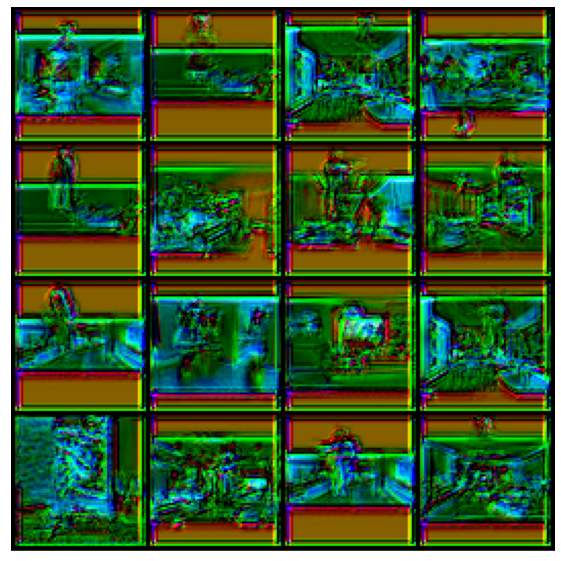

loss=1.5036053657531738 l1=0.3165148198604584 l2=0.8705757856369019:   5%|▌         | 51/1000 [02:30<58:43,  3.71s/it]  

Train Epoch : 1 [200/16000 (5%)]	Loss: 1.503605


loss=1.4821230173110962 l1=0.3171961009502411 l2=0.847730815410614:  10%|█         | 101/1000 [04:48<32:38,  2.18s/it]

Train Epoch : 1 [400/16000 (10%)]	Loss: 1.482123


loss=1.474751591682434 l1=0.3259114623069763 l2=0.8229286670684814:  15%|█▌        | 151/1000 [07:28<52:10,  3.69s/it]

Train Epoch : 1 [600/16000 (15%)]	Loss: 1.474752


loss=1.470137596130371 l1=0.3143519163131714 l2=0.8414337038993835:  20%|██        | 201/1000 [10:03<54:41,  4.11s/it]

Train Epoch : 1 [800/16000 (20%)]	Loss: 1.470138


loss=1.4094104766845703 l1=0.31658023595809937 l2=0.7762500643730164:  25%|██▌       | 251/1000 [12:38<39:08,  3.14s/it]

Train Epoch : 1 [1000/16000 (25%)]	Loss: 1.409410


loss=1.4533121585845947 l1=0.31968364119529724 l2=0.8139448165893555:  30%|███       | 301/1000 [14:55<53:10,  4.56s/it]

Train Epoch : 1 [1200/16000 (30%)]	Loss: 1.453312


loss=1.4767165184020996 l1=0.3267069458961487 l2=0.823302686214447:  35%|███▌      | 350/1000 [17:32<32:59,  3.05s/it]  

Train Epoch : 1 [1400/16000 (35%)]	Loss: 1.476717


loss=1.4687819480895996 l1=0.3130553960800171 l2=0.8426711559295654:  40%|████      | 400/1000 [19:58<28:11,  2.82s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Train Epoch : 1 [1600/16000 (40%)]	Loss: 1.468782


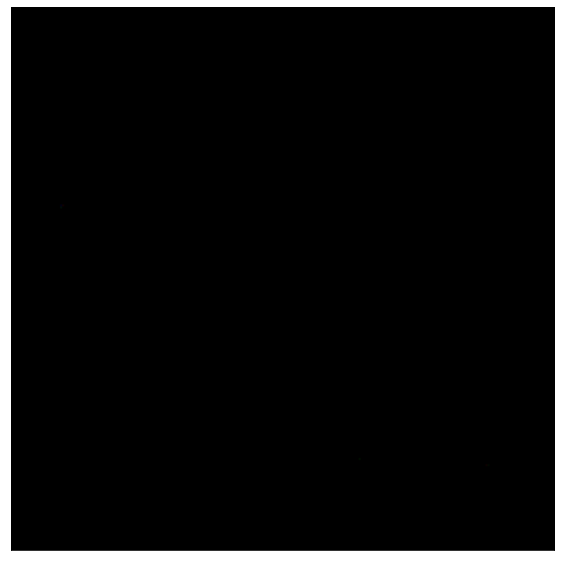

loss=1.4690444469451904 l1=0.33423253893852234 l2=0.8005794286727905:  45%|████▌     | 450/1000 [22:26<23:46,  2.59s/it]

Train Epoch : 1 [1800/16000 (45%)]	Loss: 1.469044


loss=1.4439153671264648 l1=0.3135470151901245 l2=0.8168213367462158:  50%|█████     | 501/1000 [25:00<17:50,  2.15s/it]

Train Epoch : 1 [2000/16000 (50%)]	Loss: 1.443915


loss=1.4657561779022217 l1=0.3212118148803711 l2=0.8233324885368347:  55%|█████▌    | 551/1000 [27:33<29:36,  3.96s/it]

Train Epoch : 1 [2200/16000 (55%)]	Loss: 1.465756


loss=1.434011459350586 l1=0.3194030523300171 l2=0.7952053546905518:  60%|██████    | 601/1000 [29:58<14:31,  2.18s/it]

Train Epoch : 1 [2400/16000 (60%)]	Loss: 1.434011


loss=1.4648431539535522 l1=0.32060861587524414 l2=0.823625922203064:  65%|██████▌   | 650/1000 [32:17<17:32,  3.01s/it] 

Train Epoch : 1 [2600/16000 (65%)]	Loss: 1.464843


loss=1.4960294961929321 l1=0.3334449231624603 l2=0.8291396498680115:  70%|███████   | 701/1000 [34:36<16:46,  3.36s/it]

Train Epoch : 1 [2800/16000 (70%)]	Loss: 1.496029


loss=1.4578368663787842 l1=0.32143065333366394 l2=0.8149756193161011:  75%|███████▌  | 751/1000 [37:02<13:57,  3.36s/it]

Train Epoch : 1 [3000/16000 (75%)]	Loss: 1.457837


loss=1.4486184120178223 l1=0.32171958684921265 l2=0.8051792979240417:  80%|████████  | 800/1000 [39:29<10:20,  3.10s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Train Epoch : 1 [3200/16000 (80%)]	Loss: 1.448618


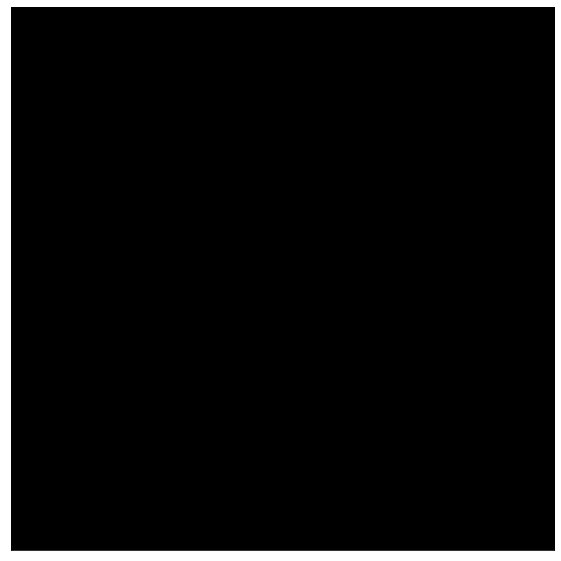

loss=1.496079683303833 l1=0.3255227506160736 l2=0.845034122467041:  85%|████████▌ | 851/1000 [41:56<08:35,  3.46s/it]

Train Epoch : 1 [3400/16000 (85%)]	Loss: 1.496080


loss=1.4941091537475586 l1=0.31991904973983765 l2=0.8542711138725281:  90%|█████████ | 901/1000 [45:00<09:26,  5.72s/it]

Train Epoch : 1 [3600/16000 (90%)]	Loss: 1.494109


loss=1.4633891582489014 l1=0.3281741142272949 l2=0.8070408701896667:  95%|█████████▌| 951/1000 [47:26<02:39,  3.26s/it]

Train Epoch : 1 [3800/16000 (95%)]	Loss: 1.463389


loss=1.4564645290374756 l1=0.3134606182575226 l2=0.8295432329177856: 100%|██████████| 1000/1000 [49:53<00:00,  2.99s/it]


In [0]:
for epoch in range(1,2):
  train(model, criterion,device, train_dl, optim, epoch)
  scheduler.step()


loss=1.4368170499801636 l1=0.3177454471588135 l2=0.8013261556625366:   0%|          | 0/1000 [00:00<?, ?it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Train Epoch : 1 [0/16000 (0%)]	Loss: 1.436817


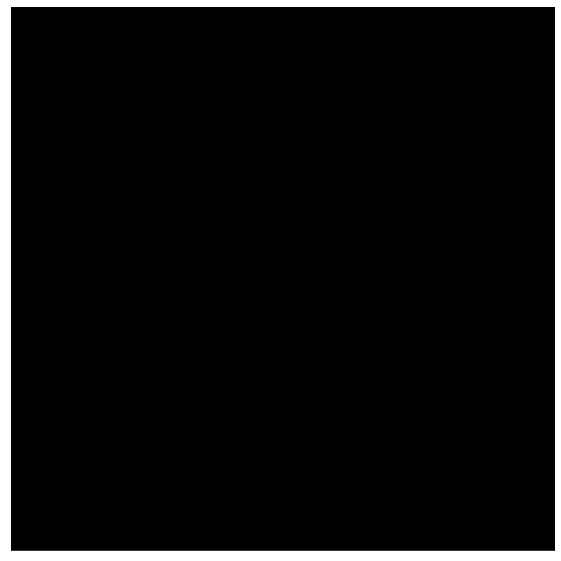

loss=1.4721951484680176 l1=0.3254547715187073 l2=0.821285605430603:   5%|▌         | 51/1000 [00:15<05:01,  3.15it/s]

Train Epoch : 1 [200/16000 (5%)]	Loss: 1.472195


loss=1.5005028247833252 l1=0.32614320516586304 l2=0.8482164740562439:  10%|█         | 101/1000 [00:29<04:11,  3.58it/s]

Train Epoch : 1 [400/16000 (10%)]	Loss: 1.500503


loss=1.423203945159912 l1=0.31488803029060364 l2=0.7934278845787048:  15%|█▌        | 151/1000 [00:43<04:01,  3.51it/s]

Train Epoch : 1 [600/16000 (15%)]	Loss: 1.423204


loss=1.4454751014709473 l1=0.3076109290122986 l2=0.8302532434463501:  20%|██        | 201/1000 [00:57<03:42,  3.59it/s]

Train Epoch : 1 [800/16000 (20%)]	Loss: 1.445475


loss=1.4682209491729736 l1=0.32680314779281616 l2=0.8146147131919861:  25%|██▌       | 251/1000 [01:11<03:34,  3.50it/s]

Train Epoch : 1 [1000/16000 (25%)]	Loss: 1.468221


loss=1.418047547340393 l1=0.3059193789958954 l2=0.8062087893486023:  30%|███       | 301/1000 [01:25<03:17,  3.54it/s]

Train Epoch : 1 [1200/16000 (30%)]	Loss: 1.418048


loss=1.4662538766860962 l1=0.3089523911476135 l2=0.8483490943908691:  35%|███▌      | 351/1000 [01:39<03:06,  3.49it/s]

Train Epoch : 1 [1400/16000 (35%)]	Loss: 1.466254


loss=1.4382920265197754 l1=0.3126891851425171 l2=0.8129135966300964:  40%|████      | 400/1000 [01:53<02:44,  3.66it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Train Epoch : 1 [1600/16000 (40%)]	Loss: 1.438292


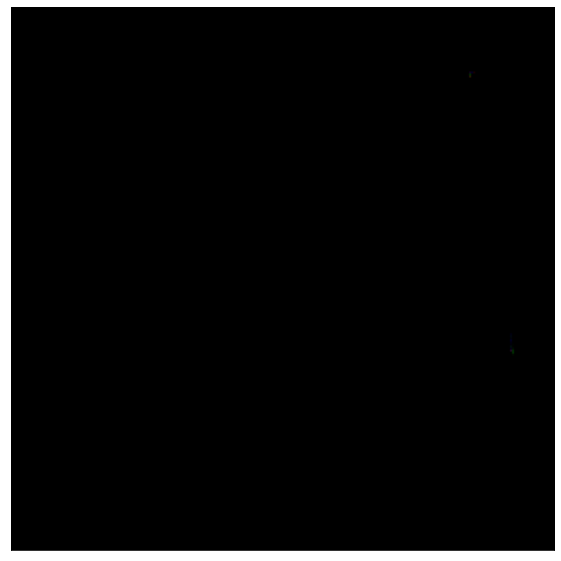

loss=1.4772160053253174 l1=0.3304637670516968 l2=0.8162884712219238:  45%|████▌     | 451/1000 [02:07<02:33,  3.57it/s]

Train Epoch : 1 [1800/16000 (45%)]	Loss: 1.477216


loss=1.4776291847229004 l1=0.3228680193424225 l2=0.8318932056427002:  50%|█████     | 501/1000 [02:21<02:21,  3.53it/s]

Train Epoch : 1 [2000/16000 (50%)]	Loss: 1.477629


loss=1.4822990894317627 l1=0.31130450963974 l2=0.8596900701522827:  55%|█████▌    | 551/1000 [02:35<02:07,  3.51it/s]

Train Epoch : 1 [2200/16000 (55%)]	Loss: 1.482299


loss=1.4621844291687012 l1=0.3177937865257263 l2=0.8265969157218933:  60%|██████    | 601/1000 [02:49<01:55,  3.46it/s]

Train Epoch : 1 [2400/16000 (60%)]	Loss: 1.462184


loss=1.4774047136306763 l1=0.3271392583847046 l2=0.8231261968612671:  65%|██████▌   | 651/1000 [03:03<01:39,  3.49it/s]

Train Epoch : 1 [2600/16000 (65%)]	Loss: 1.477405


loss=1.4133039712905884 l1=0.30974870920181274 l2=0.7938065528869629:  70%|███████   | 701/1000 [03:16<01:21,  3.65it/s]

Train Epoch : 1 [2800/16000 (70%)]	Loss: 1.413304


loss=1.4494796991348267 l1=0.31437355279922485 l2=0.820732593536377:  75%|███████▌  | 751/1000 [03:30<01:11,  3.50it/s]

Train Epoch : 1 [3000/16000 (75%)]	Loss: 1.449480


loss=1.4630324840545654 l1=0.3313877582550049 l2=0.8002569675445557:  80%|████████  | 800/1000 [03:44<00:54,  3.65it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Train Epoch : 1 [3200/16000 (80%)]	Loss: 1.463032


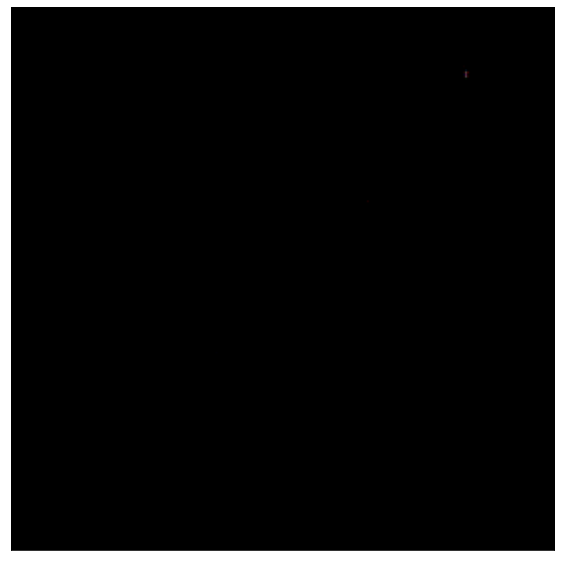

loss=1.4709315299987793 l1=0.3130185008049011 l2=0.8448945879936218:  85%|████████▌ | 851/1000 [03:58<00:42,  3.55it/s]

Train Epoch : 1 [3400/16000 (85%)]	Loss: 1.470932


loss=1.4667483568191528 l1=0.32220467925071716 l2=0.8223389983177185:  90%|█████████ | 901/1000 [04:12<00:28,  3.52it/s]

Train Epoch : 1 [3600/16000 (90%)]	Loss: 1.466748


loss=1.4735829830169678 l1=0.32368844747543335 l2=0.8262060880661011:  95%|█████████▌| 951/1000 [04:26<00:14,  3.36it/s]

Train Epoch : 1 [3800/16000 (95%)]	Loss: 1.473583


loss=1.5229835510253906 l1=0.32822707295417786 l2=0.8665293455123901: 100%|██████████| 1000/1000 [04:40<00:00,  3.57it/s]


In [0]:
for epoch in range(1,2):
  train(model, criterion,device, train_dl, optim, epoch)
  scheduler.step()


In [0]:
print(sum(p.numel() for p in model.parameters() if p.requires_grad))